In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### < DataFrame 다중 인덱스 >
row이나 column에 여러 계층을 가지는 인덱스 즉, 다중 인덱스(multi-index)를 설정할 
수도 있습니다. DataFrame을 생성할 때 columns 인수에 다음 예제처럼 리스트의 
리스트(행렬) 형태로 인덱스를 넣으면 다중 열 인덱스를 가지게 됩니다.

In [2]:
np.random.seed(0)
df3 = pd.DataFrame(np.round(np.random.randn(5, 4), 2),
                   columns = [["A", "A", "B", "B"],
                              ["C1", "C2", "C1", "C2"]])
df3

A           B      
     C1    C2    C1    C2
0  1.76  0.40  0.98  2.24
1  1.87 -0.98  0.95 -0.15
2 -0.10  0.41  0.14  1.45
3  0.76  0.12  0.44  0.33
4  1.49 -0.21  0.31 -0.85

- 다중 인덱스는 이름을 지정하면 더 편리하게 사용할 수 있습니다. column 인덱스들의 
이름 지정은 columns 객체의 names 속성에 리스트를 넣어서 지정합니다.

In [3]:
df3.columns.names = ["Cidx1", "Cidx2"]
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

- 마찬가지로 DataFrame을 생성할 때 index 인수에 리스트의 리스트(행렬) 형태로 
인덱스를 넣으면 다중 (row) 인덱스를 가집니다. row 인덱스들의 이름 지정은 index 
객체의 names 속성에 리스트를 넣어서 지정합니다.

In [4]:
np.random.seed(0)
df4 = pd.DataFrame(np.round(np.random.randn(6, 4), 2),
                   columns = [["A", "A", "B", "B"],
                              ["C", "D", "C", "D"]],
                   index = [["M", "M", "M", "F", "F", "F"],
                            ["id_" + str(i + 1) for i in range(3)] * 2])
df4.columns.names = ["Cidx1", "Cidx2"]
df4.index.names = ["Ridx1", "Ridx2"]
df4                    

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [5]:
# 강사님이 컬럼 왼쪽 정렬로 바꿔주신 것 

dfStyler = df3.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th',
                                props=[('text-align', 'left')])])

### < DataFrame row 인덱스와 column 인덱스 교환 >

stack() 메서드나 unstack() 메서드를 쓰면 column 인덱스를 row 인덱스로 바꾸거나 
반대로 row 인덱스를 column 인덱스로 바꿀 수 있습니다.
- stack() 메서드: column 인덱스 -> row 인덱스로 변환
- unstack() 메서드: row 인덱스 -> column 인덱스로 변환

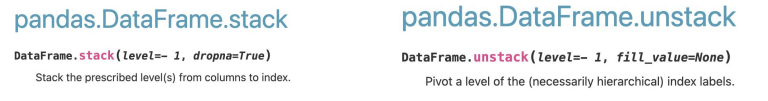

- stack 메서드를 실행하면 column 인덱스가 반시계 방향으로 90도 회전한 것과 비슷한 
모양이 됩니다.

In [6]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [7]:
df4.stack("Cidx1")

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

- unstack 메서드를 실행하면 row 인덱스가 시계 방향으로 90도 회전한 것과 비슷합니다. 


In [8]:
df4.unstack("Ridx2")

Cidx1     A                                   B                              
Cidx2     C                 D                 C                 D            
Ridx2  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3  id_1  id_2  id_3
Ridx1                                                                        
F      0.76  1.49 -2.55  0.12 -0.21  0.65  0.44  0.31  0.86  0.33 -0.85 -0.74
M      1.76  1.87 -0.10  0.40 -0.98  0.41  0.98  0.95  0.14  2.24 -0.15  1.45

- 인덱스를 지정할 때는 문자열 이름과 순서를 표시하는 숫자 인덱스를 모두 사용할 수 
있습니다.

In [9]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [10]:
df4.stack("Cidx1")

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

In [11]:
df4.stack(0)

Cidx2                 C     D
Ridx1 Ridx2 Cidx1            
M     id_1  A      1.76  0.40
            B      0.98  2.24
      id_2  A      1.87 -0.98
            B      0.95 -0.15
      id_3  A     -0.10  0.41
            B      0.14  1.45
F     id_1  A      0.76  0.12
            B      0.44  0.33
      id_2  A      1.49 -0.21
            B      0.31 -0.85
      id_3  A     -2.55  0.65
            B      0.86 -0.74

### < DataFrame 다중 인덱스가 있는 경우의 인덱싱 >
- DataFrame이 다중 인덱스를 가지는 경우에는 인덱스 값이 하나의 label이나 숫자가 아니라 ()로 둘러싸인 튜플이 되어야 합니다. 

- 예를 들어 앞에서 만든 df3 DataFrame의 경우 다음 코드와 같이 인덱싱할 수 있습니다.

In [12]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [13]:
df3[("B", "C1")]

0    0.98
1    0.95
2    0.14
3    0.44
4    0.31
Name: (B, C1), dtype: float64

- loc 인덱서를 사용하는 경우에도 마찬가지로 튜플을 사용해서 인덱싱해야 합니다.


In [14]:
df3

Cidx1     A           B      
Cidx2    C1    C2    C1    C2
0      1.76  0.40  0.98  2.24
1      1.87 -0.98  0.95 -0.15
2     -0.10  0.41  0.14  1.45
3      0.76  0.12  0.44  0.33
4      1.49 -0.21  0.31 -0.85

In [18]:
df3.loc[0, ("B", "C1")]

0.98

In [28]:
# 값을 변경할 때는 인덱싱 후 할당만 하면됨
df3.loc[0, ("B", "C1")] = 100
df3

Cidx1     A             B      
Cidx2    C1    C2      C1    C2
0      1.76  0.40  100.00  2.24
1      1.87 -0.98    0.95 -0.15
2     -0.10  0.41    0.14  1.45
3      0.76  0.12    0.44  0.33
4      1.49 -0.21    0.31 -0.85

- 단, iloc 인덱서를 사용하는 경우에는 튜플 형태의 다중인덱스를 사용할 수 없습니다.

In [20]:
df3

Cidx1     A             B      
Cidx2    C1    C2      C1    C2
0      1.76  0.40  100.00  2.24
1      1.87 -0.98    0.95 -0.15
2     -0.10  0.41    0.14  1.45
3      0.76  0.12    0.44  0.33
4      1.49 -0.21    0.31 -0.85

In [31]:
df3.iloc[0, 2]

100.0

In [32]:
df3.iloc[1, 1]

-0.98

- 만약 하나의 레벨 값만 넣으면 다중 인덱스 중에서 가장 상위의 값을 지정한 것으로 
반환합니다.

In [22]:
df3['A']

Cidx2,C1,C2
0,1.76,0.40
1,1.87,-0.98
2,-0.10,0.41
3,0.76,0.12
4,1.49,-0.21


- df4 DataFrame은 다음과 같이 인덱싱할 수 있습니다.

In [23]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [24]:
df4.loc[("M", "id_1"), ("A", "C")]

1.76

In [25]:
df4.loc[:, ("A", "C")]

Ridx1  Ridx2
M      id_1     1.76
       id_2     1.87
       id_3    -0.10
F      id_1     0.76
       id_2     1.49
       id_3    -2.55
Name: (A, C), dtype: float64

- df4 DataFrame은 다음과 같이 인덱싱할 수 있습니다.

In [26]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74

In [27]:
df4.loc[("M", "id_1"), :]

Cidx1  Cidx2
A      C        1.76
       D        0.40
B      C        0.98
       D        2.24
Name: (M, id_1), dtype: float64

In [33]:
df4.loc[("All" ,"All"), : ] = df4.sum()
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

- loc를 사용하는 경우에도 튜플이 아닌 하나의 값만 쓰면 가장 상위의 인덱스를 지정한 
것과 같습니다.

In [34]:
df4

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [35]:
df4.loc["M"]

Cidx1     A           B      
Cidx2     C     D     C     D
Ridx2                        
id_1   1.76  0.40  0.98  2.24
id_2   1.87 -0.98  0.95 -0.15
id_3  -0.10  0.41  0.14  1.45

- 특정 레벨의 모든 인덱스 값을 인덱싱할 때는 슬라이스를 사용합니다. 다만 다중 
인덱스의 튜플 내에서는 콜론(:), 즉 슬라이스 기호를 사용할 수 없고 대신 slice(None) 
값을 사용해야 합니다.

In [36]:
df4.loc[("M", slice(None)), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45

In [38]:
df4.loc[(slice(None), "id_1"), :]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
F     id_1   0.76  0.12  0.44  0.33

### < DataFrame 다중 인덱스의 인덱스 순서 교환 >

다중 인덱스의 인덱스 순서를 바꾸고 싶으면 swaplevel 명령을 사용합니다.

- swaplevel(i, j, axis)

i와 j는 교환하고자 하는 인덱스 label(혹은 인덱스 번호)이고 axis는 0일 때 row 인덱스, 
1일 때 column 인덱스를 뜻합니다. 디폴트는 행 인덱스입니다.

In [39]:
df6 = df4.swaplevel("Cidx1", "Cidx2", 1)
df6

Cidx2           C     D     C     D
Cidx1           A     A     B     B
Ridx1 Ridx2                        
M     id_1   1.76  0.40  0.98  2.24
      id_2   1.87 -0.98  0.95 -0.15
      id_3  -0.10  0.41  0.14  1.45
F     id_1   0.76  0.12  0.44  0.33
      id_2   1.49 -0.21  0.31 -0.85
      id_3  -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

In [40]:
df5 = df4.swaplevel("Ridx1", "Ridx2")
df5

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

### < DataFrame 다중 인덱스가 있는 경우의 정렬 >

다중 인덱스가 있는 DataFrame을 sort_index로 정렬할 때는 level 인수를 사용하여 
어떤 인덱스를 기준으로 정렬하는지 알려주어야 합니다.

In [42]:
df5.sort_index(level = 0)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
All   All    3.23  0.39  3.68  2.28
id_1  F      0.76  0.12  0.44  0.33
      M      1.76  0.40  0.98  2.24
id_2  F      1.49 -0.21  0.31 -0.85
      M      1.87 -0.98  0.95 -0.15
id_3  F     -2.55  0.65  0.86 -0.74
      M     -0.10  0.41  0.14  1.45

In [43]:
df5.sort_index(axis = 1, level = 0)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M      1.76  0.40  0.98  2.24
id_2  M      1.87 -0.98  0.95 -0.15
id_3  M     -0.10  0.41  0.14  1.45
id_1  F      0.76  0.12  0.44  0.33
id_2  F      1.49 -0.21  0.31 -0.85
id_3  F     -2.55  0.65  0.86 -0.74
All   All    3.23  0.39  3.68  2.28

### < DataFrame 합성 >
- pandas는 두 개 이상의 DataFrame을 하나로 합치는 데이터 병합(merge)이나 연결
(concatenate)을 지원합니다.

### < DataFrame merge() >

merge 함수는 두 데이터 프레임의 공통 column 혹은 인덱스를 기준으로 두 개의
테이블을 합칩니다. 이 때 기준이 되는 column, row의 데이터를 키(key)라고 합니다.

In [44]:
df1 = pd.DataFrame({
    "고객번호" : [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    "이름" : ["둘리", "도우너", "또치", "길동", "희동", "마이콜", "영희"]
}
    , columns = ["고객번호", "이름"])

df1

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


### < DataFrame merge() >
merge 함수는 두 데이터 프레임의 공통 column 혹은 인덱스를 기준으로 두 개의
테이블을 합친다. 이 때 기준이 되는 column, row의 데이터를 키(key)라고 합니다.

In [45]:
df2 = pd.DataFrame({
    "고객번호" : [1001, 1001, 1005, 1006, 1008, 1001],
    "금액" : [10000, 20000, 15000, 5000, 100000, 30000]
}
    , columns = ["고객번호", "금액"])

df2

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


- merge 함수로 위의 두 DataFrame df1, df2 를 합치면 공통 column인 고객번호
column을 기준으로 데이터를 찾아서 합칩니다. 
- 이 때 기본적으로는 양쪽 DataFrame에
모두 키가 존재하는 데이터만 보여주는 inner join 방식을 사용합니다.

In [46]:
pd.merge(df1, df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


- outer join 방식은 키 값이 한쪽에만 있어도 데이터를 보여줍니다.

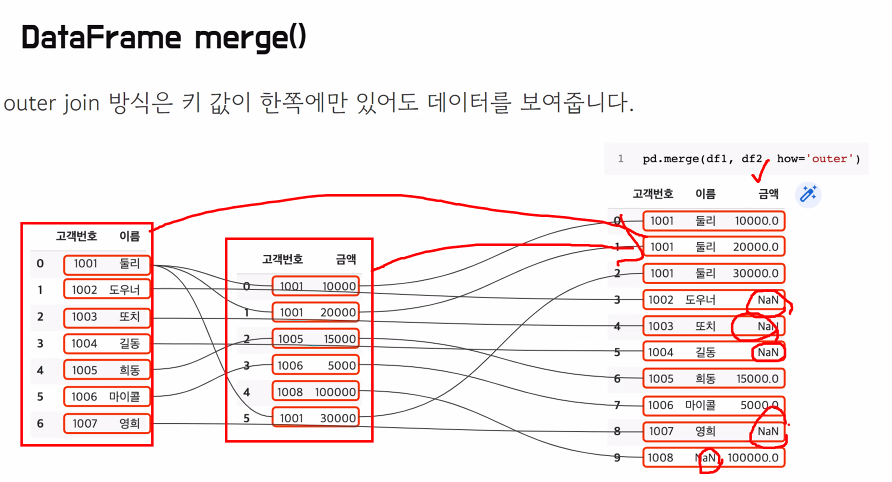
누락되는 거 없이 다 보여줌. 데이터 없는 건 NaN값으로 표현

In [47]:
pd.merge(df1, df2, how = 'outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


- left는 첫 번째 인수 기준으로, right는 두번째 인수 기준으로 DataFrame의 키 값을 모두 보여줍니다.

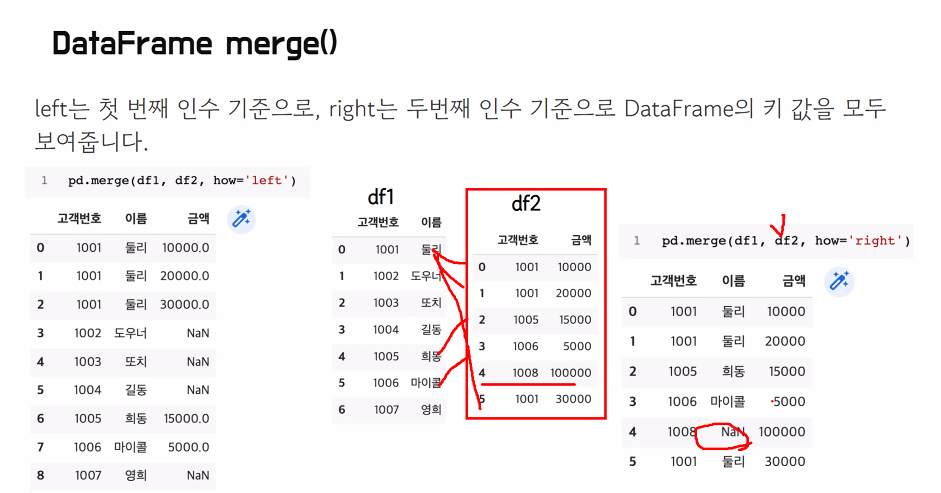

In [48]:
pd.merge(df1, df2, how = 'left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [49]:
pd.merge(df1, df2, how = 'right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


- 만약 테이블에 키 값이 같은 데이터가 여러개 있는 경우에는 있을 수 있는 모든 경우의
수를 따져서 조합을 만들어 냅니다.

In [52]:
df1 = pd.DataFrame({
    '품종' : ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이' : [1.4, 1.3, 1.5, 1.3]},
    columns = ['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [54]:
df2 = pd.DataFrame({
    '품종' : ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비' : [0.4, 0.3, 0.5, 0.3]},
    columns = ['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [55]:
pd.merge(df1, df2)

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


이 데이터에서 키 값 setosa에 대해 왼쪽 DataFrame는 1.4와 1.3라는 2개의 데이터,
오른쪽 DataFrame에 0.4라는 1개의 데이터가 있으므로 병합된 데이터에는 setosa가
(1.4, 0.4), (1.3, 0.4) 두 개의 데이터가 생깁니다. 키 값 virginica의 경우에는 왼쪽
DataFrame에 1.5와 1.3라는 2개의 데이터, 오른쪽 DataFrame에 0.3와 0.5라는 2개의
데이터가 있으므로 2개와 2개의 조합에 의해 4가지 값이 생깁니다.

### < DataFrame 그룹 분석 >

만약 키가 지정하는 조건에 맞는 데이터가 하나 이상이라서 데이터 그룹을 이루는 경우에는 그룹의 특성을 보여주는 그룹분석(group analysis)을 해야 합니다.

그룹분석은 키에 의해서 결정되는 데이터가 여러개가 있을 경우 미리 지정한 연산을 통해 
그 그룹 데이터의 대표값을 계산합니다. 

pandas에서는 groupby 메서드를 사용하여 다음처럼 그룹분석을 합니다.

1. 분석하고자 하는 Series나 DataFrame에 groupby 메서드를 호출하여 그룹화를 합니다.

2. 그룹 객체에 대해 그룹연산을 수행합니다.

### < DataFrame groupby() >

groupby 메서드는 데이터를 그룹 별로 분류하는 역할을 합니다. 

groupby 메서드의 인수로는 다음과 같은 값을 사용합니다.

- column 또는 column의 리스트

- row 인덱스

연산 결과로 그룹 데이터를 나타내는 GroupBy 클래스 객체를 반환합니다. 

이 객체에는 그룹별로 연산을 할 수 있는 그룹연산 메서드가 있습니다.

### < DataFrame 그룹 연산 메서드 >

groupby 결과, 즉 GroupBy 클래스 객체의 뒤에 붙일 수 있는 그룹연산 메서드는 다양합니다. 

다음은 자주 사용되는 그룹연산 메서드들입니다.

- size(), count()  : 그룹 데이터의 개수

- mean(), median(), min(), max(): 그룹 데이터의 평균, 중앙값, 최소, 최대

- sum(), prod(), std(), var(), quantile() : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수

- first(), last(): 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터

예를 들어 다음과 같은 데이터가 있을 때 key1의 값(A 또는 B)에 따른 data1의 합계는 
어떻게 구할까?

In [59]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1' : list("AABBA"),
    'key2' : ['one', 'two', 'one', 'two', 'one'],
    'data1' : [1, 2, 3, 4, 5],
    'data2' : [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


groupby 명령을 사용하여 그룹 A와 그룹 B로 구분한 그룹 데이터를 만든다.


In [60]:
groups = df2.groupby(df2.key1)
groups

이 GroupBy 클래스 객체에는 각 그룹 데이터의 인덱스를 저장한 groups 속성이 
있습니다.

In [61]:
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

A그룹과 B그룹 데이터의 합계를 구하기 위해 sum이라는 그룹연산을 합니다.

In [62]:
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


GroupBy 클래스 객체를 명시적으로 얻을 필요가 없다면 groupby 메서드와 그룹연산 
메서드를 연속으로 호출합니다. 다음 예제는 column data1에 대해서만 그룹연산을 
하는 코드입니다.

In [63]:
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

데이터를 그룹으로 나눈 GroupBy 클래스 객체 또는 그룹분석한 결과에서 data1만 
뽑아도 됩니다.

In [64]:
df2.groupby(df2.key1)['data1'].sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [65]:
df2.groupby(df2.key1).sum()['data1']

key1
A    8
B    7
Name: data1, dtype: int64

이번에는 복합 키 (key1, key2) 값에 따른 data1의 합계를 구하자. 분석하고자 하는 
키가 복수이면 리스트를 사용합니다.

In [69]:
df2.data1.groupby([df2.key1, df2.key2]).sum()

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

### < DataFrame 시계열 자료 다루기 DatetimeIndex >
시계열 자료는 인덱스가 날짜 혹은 시간인 데이터를 말합니다. 

pandas에서 시계열 자료를 생성하려면 인덱스를 DatetimeIndex 자료형으로 만들어야 합니다. 

DatetimeIndex는 특정한 순간에 기록된 타임스탬프(timestamp) 형식의 시계열 자료를 루기 위한 인덱스입니다. 

타임스탬프 인덱스의 label값이 반드시 일정한 간격일 필요는 없습니다.

- DatetimeIndex 인덱스는 다음과 같은 보조 메서드를 사용하여 생성합니다.

- pd.to_datetime 메서드

- pd.date_range 메서드


pd.to_datetime 메서드를 쓰면 날짜/시간을 나타내는 문자열을 자동으로 datetime 
자료형으로 바꾼 후 DatetimeIndex 자료형 인덱스를 생성합니다

In [75]:
date_str = ['2018, 1, 1','2018, 1, 4', '2018, 1, 5', '2018, 1, 6']
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

이렇게 만들어진 인덱스를 사용하여 Series나 DataFrame을 생성하면 됩니다.

In [76]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index = idx)
s

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

pd.date_range 메서드를 쓰면 모든 날짜/시간을 일일이 입력할 필요없이 시작일과 종료일 
또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 줍니다.


In [80]:
pd.date_range('2018-4-1', '2018-4-30')

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [81]:
pd.date_range('2018-4-1', periods = 30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

freq 인수로 특정한 날짜만 생성되도록 할 수도 있습니다. 

많이 사용되는 freq 인수값은 다음과 같습니다.

- s: 초
- T: 분
- H: 시간

- D: 일(day)

- B: 주말이 아닌 평일
- W: 주(일요일)
- W-MON: 주(월요일)
- M: 각 달(month)의 마지막 날
- MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- WOM-2THU: 각 달의 두번째 목요일
- Q-JAN: 각 분기의 첫달의 마지막 날
- Q-DEC: 각 분기의 마지막 달의 마지막 날


In [83]:
# B는 주말이 아닌 평일을 가르킵니다.
pd.date_range('2018-4-1', '2018-4-30', freq = 'B')

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='B')

In [84]:
# W는 일요일입니다.
pd.date_range('2018-4-1', '2018-4-30', freq = 'W')

DatetimeIndex(['2018-04-01', '2018-04-08', '2018-04-15', '2018-04-22',
               '2018-04-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [85]:
# W-MON은 월요일입니다.
pd.date_range('2018-4-1', '2018-4-30', freq = 'W-MON')

DatetimeIndex(['2018-04-02', '2018-04-09', '2018-04-16', '2018-04-23',
               '2018-04-30'],
              dtype='datetime64[ns]', freq='W-MON')

In [89]:
# M: 각 달(month)의 마지막 날
pd.date_range('2018-4-1', '2018-12-31', freq = 'M')

DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [88]:
# MS: 각 달의 첫날
pd.date_range('2018-4-1', '2018-12-31', freq = 'MS')

DatetimeIndex(['2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [90]:
# BMS: 주말이 아닌 평일 중에서 각 달의 첫날
pd.date_range('2018-4-1', '2018-12-31', freq = 'BMS')

DatetimeIndex(['2018-04-02', '2018-05-01', '2018-06-01', '2018-07-02',
               '2018-08-01', '2018-09-03', '2018-10-01', '2018-11-01',
               '2018-12-03'],
              dtype='datetime64[ns]', freq='BMS')

In [91]:
# BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
pd.date_range('2018-4-1', '2018-12-31', freq = 'BM')

DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-29', '2018-07-31',
               '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='BM')

In [92]:
# WOM-2THU: 각 달의 두번째 목요일
pd.date_range('2018-4-1', '2018-12-31', freq = 'WOM-2THU')

DatetimeIndex(['2018-04-12', '2018-05-10', '2018-06-14', '2018-07-12',
               '2018-08-09', '2018-09-13', '2018-10-11', '2018-11-08',
               '2018-12-13'],
              dtype='datetime64[ns]', freq='WOM-2THU')

- 시계열 데이터의 인덱스는 시간이나 날짜를 나타내기 때문에 날짜 이동 등의 다양한 연산이 가능합니다. 

- 예를 들어 shift 연산을 사용하면 인덱스는 그대로 두고 데이터만 이동할 수도 있습니다.


In [93]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index = pd.date_range(
    '2018-1-1', periods = 4, freq = 'M'))
ts

2018-01-31    1.764052
2018-02-28    0.400157
2018-03-31    0.978738
2018-04-30    2.240893
Freq: M, dtype: float64

In [94]:
ts.shift(1)

2018-01-31         NaN
2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
Freq: M, dtype: float64

In [95]:
ts.shift(-1)

2018-01-31    0.400157
2018-02-28    0.978738
2018-03-31    2.240893
2018-04-30         NaN
Freq: M, dtype: float64

In [96]:
ts.shift(1, freq = 'M')

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [98]:
ts.shift(1, freq = 'W')  # 기준에서 일주일씩 미뤄지는거

2018-02-04    1.764052
2018-03-04    0.400157
2018-04-01    0.978738
2018-05-06    2.240893
dtype: float64

- datetime 자료형 Series에는 dt 접근자가 있어 datetime 자료형이 가진 몇가지 유용한 
속성과 메서드를 사용할 수 있습니다.

In [99]:
s = pd.Series(pd.date_range('2020-12-25', periods = 100, freq = 'D'))
s

0    2020-12-25
1    2020-12-26
2    2020-12-27
3    2020-12-28
4    2020-12-29
        ...    
95   2021-03-30
96   2021-03-31
97   2021-04-01
98   2021-04-02
99   2021-04-03
Length: 100, dtype: datetime64[ns]

- 예를 들어 year, month, day, weekday의 속성을 이용하면 년, 월, 일, 요일 정보를 빼낼 수 
있습니다.


In [103]:
s.dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
95    2021
96    2021
97    2021
98    2021
99    2021
Length: 100, dtype: int64

In [101]:
s.dt.weekday

0     4
1     5
2     6
3     0
4     1
     ..
95    1
96    2
97    3
98    4
99    5
Length: 100, dtype: int64

- strftime 메서드를 이용하여 문자열을 만드는 것도 가능합니다.

In [104]:
s.dt.strftime('%Y년 %m월 %d일')

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

### < Pandas 연습 문제 >

타이타닉호 데이터셋을 불러옵니다. 

그리고 alive라는 column의 값이 ‘no’면 False로 ‘yes’
면 True로 변경해봅시다.

(1) change_boolean(value) 함수를 만듭니다. 이 함수는 value 값이 ‘yes’면 True를 반환하고 ‘no’이면 False를 반환합니다.

(2) 만든 함수를 활용해서 타이타닉호 데이터셋 중 alive라는 column의 값을 ‘no’면 
False로 ‘yes’면 True로 치환해서 boolean 타입으로 변경해보세요.

In [115]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [116]:
titanic['alive'].unique()

array(['no', 'yes'], dtype=object)

In [117]:
# (1)
def change_boolean(value) :
    if value == 'yes' :
        return True
    else :
        return False
    
# (2)    
titanic['alive'] = titanic['alive'].apply(change_boolean)

In [118]:
titanic['alive']

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: alive, Length: 891, dtype: bool

In [119]:
titanic['alive'].unique()

array([False,  True])

# 뒤 연습문제들 과제